In [3]:
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import seaborn as sns

In [4]:
df1 = pd.read_csv(r'C:\Users\georges\OneDrive\Desktop\ownProject\model\train_first_part_nostradamovies.csv')
df2 = pd.read_csv(r'C:\Users\georges\OneDrive\Desktop\ownProject\model\train_second_part_nostradamovies.csv')
df1.dtypes

Unnamed: 0        int64
Id               object
Genre            object
Colors           object
Faces             int64
Gender           object
Age              object
Race             object
Emotions         object
Text position    object
dtype: object

In [5]:
# Get all genre
def get_unique_genre(df, uniques_genre):
    for genres in df['Genre'].unique():
        g = genres.replace('[', '').replace(']', '').replace("'", '').replace(' ', '').split(',')
        for genre in g:
            if genre not in uniques_genre:
                uniques_genre.append(genre)
    return uniques_genre


uniques_genre = get_unique_genre(df2, get_unique_genre(df1, []))
print(uniques_genre)

['Comedy', 'Drama', 'Romance', 'Music', 'Sci-Fi', 'Thriller', 'Action', 'Adventure', 'Crime', 'Horror', 'Musical', 'Biography', 'History', 'Mystery', 'Fantasy', 'Family', 'Sport', 'War', 'Animation', 'Documentary', 'Western', 'Short', 'N/A', 'Reality-TV', 'News', 'Film-Noir']


In [6]:
# Get all emotions
def get_unique_emotions(df, unique_emotion):
    for emotions in df['Emotions'].unique():
        e = emotions.replace('[', '').replace(']', '').replace("'", '').split(',')
        for emotion in e:
            if emotion.strip() is not '':
                if emotion.strip() not in unique_emotion:
                    unique_emotion.append(emotion.strip())
    return unique_emotion

uniques_emotions = get_unique_emotions(df2, get_unique_emotions(df1, []))
print(uniques_emotions)

['neutral', 'happy', 'sad', 'surprise', 'fear', 'angry', 'disgust']


<>:6: SyntaxWarning: "is not" with a literal. Did you mean "!="?
<>:6: SyntaxWarning: "is not" with a literal. Did you mean "!="?
C:\Users\georges\AppData\Local\Temp\ipykernel_7312\513476636.py:6: SyntaxWarning: "is not" with a literal. Did you mean "!="?
  if emotion.strip() is not '':


In [7]:
def bool_genre(genres):
    gs = genres.replace('[', '').replace(']', '').replace("'", '').replace(' ', '').split(',')
    genres = uniques_genre
    bools = {}
    for genre in genres:
        if genre in gs:
            bools.update({
                genre: 1
            })
        else:
            bools.update({
                genre: 0
            })
    return bools

In [8]:
def number_race(races):
    number = {}
    for race in unique_races:
        number.update({
            'Number_of_' + race: races.count(race)
        })
    return number

In [9]:
def number_emotions(emotions):
    number = {}
    for emotion in uniques_emotions:
        number.update({
            'Number_of_' + emotion: emotions.count(emotion)
        })
    return number

In [10]:
# Get all race
def get_unique_race(df, unique_race):
    for races in df['Race'].unique():
        r = races.replace('[', '').replace(']', '').replace("'", '').split(',')
        for race in r:
            if race.strip() is not '':
                if race.strip() not in unique_race:
                    unique_race.append(race.strip())
    return unique_race
 
unique_races = get_unique_race(df2, get_unique_race(df1, []))
print(unique_races)

['asian', 'white', 'black', 'latino hispanic', 'middle eastern', 'indian']


<>:6: SyntaxWarning: "is not" with a literal. Did you mean "!="?
<>:6: SyntaxWarning: "is not" with a literal. Did you mean "!="?
C:\Users\georges\AppData\Local\Temp\ipykernel_7312\2719350043.py:6: SyntaxWarning: "is not" with a literal. Did you mean "!="?
  if race.strip() is not '':


In [11]:
def number_emotions(emotions):
    number = {}
    for emotion in uniques_emotions:
        number.update({
            'Number_of_' + emotion: emotions.count(emotion)
        })
    return number

In [12]:
def get_numbers_man_woman(genders):
    return {
        'Number_man': genders.count('Man'),
        'Number_woman': genders.count('Woman')
    }

In [13]:
import ast

def get_average_age(ages):
    ages_obj = ast.literal_eval(ages)
    total_ages = 0
    number_of_ages = 0
    for age in ages_obj:
        total_ages = total_ages + age['age']
        number_of_ages = number_of_ages + 1
    if number_of_ages == 0:
        return {
            'Average_age': 0
        }
    return {
        'Average_age': round(total_ages/number_of_ages)
    }

In [14]:
def get_positions_text(text_position):
    return {
        'Text_bottom': text_position.count('bottom'),
        'Text_top': text_position.count('top')
    }

In [15]:
from ast import literal_eval
#(r * 256 * 256) + (g * 256) + b

def get_colors(colors_string):
    colors = literal_eval(colors_string.replace('[', '').replace(']', ''))
    return {
        'Color_1': (colors[0][0] * 256 * 256) + (colors[0][1] * 256) + colors[0][2],
        'Color_2': (colors[1][0] * 256 * 256) + (colors[1][1] * 256) + colors[1][2],
        'Color_3': (colors[2][0] * 256 * 256) + (colors[2][1] * 256) + colors[2][2]
    }

In [205]:
final_dataset = []

def fead_final_dataset(df):
    for index, value in df.iterrows():
        row = bool_genre(value['Genre'])
        row.update(get_colors(value['Colors']))
        row.update({
            'Faces': value['Faces']
        })
        row.update(get_numbers_man_woman(value['Gender']))
        row.update(get_average_age(value['Age']))
        row.update(number_race(value['Race']))
        row.update(number_emotions(value['Emotions']))
        row.update(get_positions_text(value['Text position']))
        final_dataset.append(row)
        
fead_final_dataset(df1)
fead_final_dataset(df2)

final_dataset = pd.DataFrame(data=final_dataset)

print(final_dataset.head())
len(final_dataset)

   Comedy  Drama  Romance  Music  Sci-Fi  Thriller  Action  Adventure  Crime  \
0       1      1        0      0       0         0       0          0      0   
1       0      1        1      1       0         0       0          0      0   
2       1      0        0      0       0         0       0          0      0   
3       0      0        0      0       1         1       0          0      0   
4       0      0        0      0       0         1       1          1      0   

   Horror  ...  Number_of_indian  Number_of_neutral  Number_of_happy  \
0       0  ...                 0                  1                1   
1       0  ...                 0                  0                0   
2       0  ...                 0                  1                3   
3       0  ...                 0                  0                0   
4       0  ...                 0                  2                0   

   Number_of_sad  Number_of_surprise  Number_of_fear  Number_of_angry  \
0            

8272

In [131]:
final_dataset

Comedy  Drama  Romance  Music  Sci-Fi  Thriller  Action  Adventure  Crime  Horror  Musical  Biography  History  Mystery  Fantasy  Family  Sport  War  Animation  Documentary  Western  Short  N/A  Reality-TV  News  Film-Noir  Color_1   Color_2   Color_3   Faces  Number_man  Number_woman  Average_age  Number_of_asian  Number_of_white  Number_of_black  Number_of_latino hispanic  Number_of_middle eastern  Number_of_indian  Number_of_neutral  Number_of_happy  Number_of_sad  Number_of_surprise  Number_of_fear  Number_of_angry  Number_of_disgust  Text_bottom  Text_top
1       0      0        0      0       0         0       0          0      0       0        0          0        0        0        0       0      0    0          0            0        1      0    0           0     0          14730059  4404513   16054224  0      0           0             0            0                0                0                0                          0                         0                 0          

In [215]:
#le nombre de visage happy par genre de film
happy_data = final_dataset.filter(like='Number_of_happy')
fi
genre_comedy_data = final_dataset.filter(like='Comedy')

count_comedy = genre_comedy_data.value_counts()
print("ddddddddd",count_comedy)
c_c = count_comedy.values[1]
print(c_c)
count_happy_data = happy_data.value_counts()
c_h = count_happy_data.values[1]
print(c_h)

count_final_dataset = final_dataset.value_counts()
print(len(count_final_dataset))
c_f = len(count_final_dataset) 

count_number_happy_face_per_comedy = (c_c + c_h)/c_f
print(count_number_happy_face_per_comedy)

df_cc_ch = pd.DataFrame({'num_happy_face': [count_happy_data],
                   'num_genre_comedy': [count_comedy]},
                  index=['number_per_comedy'])
print(df_cc_ch)

ddddddddd Comedy
0         5000
1         3272
dtype: int64
3272
1632
8228
0.5960136120563928
                                                      num_happy_face  \
number_per_comedy  Number_of_happy
0                  5775
1     ...   

                                                    num_genre_comedy  
number_per_comedy  Comedy
0         5000
1         3272
dtype: int64  


In [127]:
for col in happy_data.columns[1:-1]:
    counts = happy_data.value_counts(dropna=True, sort=True).to_frame()[:2]
    print(counts.values[1])
    plt.figure(figsize=(8, 5))
    sns.barplot(y=col, x=counts.index, palette="Blues_d", order=counts.index, data=counts)
    plt.xticks(rotation=90)
    plt.show()
    
    

AttributeError: 'Series' object has no attribute 'columns'

ValueError: Could not interpret input 'abbrev'

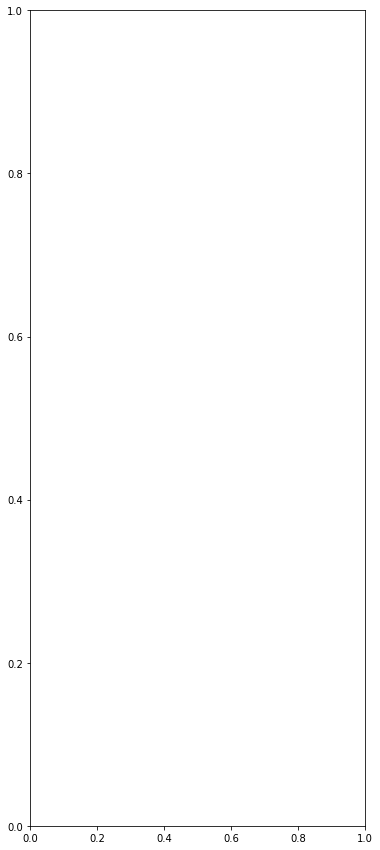

In [225]:
#Drama  Romance  Music  Sci-Fi  Thriller  Action  Adventure  Crime  Horror  Musical  Biography  History  Mystery  Fantasy  Family  Sport  War  Animation 
#Documentary  Western  Short  N/A  Reality-TV  News  Film-Noir
f, ax = plt.subplots(figsize=(6, 15))
list_items_per = ['Comedy', 'Drama', 'Romance', 'Music', 'Sci-Fi', 'Thriller', 'Action', 'Adventure',  'Crime', 'Horror', 'Musical', 'Biography']
faces = final_dataset.sort_values("Faces", ascending=False)
sns.set_color_codes("muted")
sns.barplot(x="Faces", y="", data=faces,
            label="genre", color="b")
ax.legend(ncol=2, loc="lower right", frameon=True)
ax.set(xlim=(0, 24), ylabel="",
       xlabel="Automobile collisions per billion miles")
sns.despine(left=True, bottom=True)

In [204]:
data = final_dataset.query('')

print(data)

      Comedy  Drama  Romance  Music  Sci-Fi  Thriller  Action  Adventure  \
1          0      1        1      1       0         0       0          0   
5          0      0        0      0       0         1       1          0   
8          1      1        0      0       0         0       0          0   
13         0      0        0      0       0         0       0          0   
14         0      1        0      0       0         0       1          0   
...      ...    ...      ...    ...     ...       ...     ...        ...   
8259       0      0        0      0       0         0       0          0   
8264       1      0        0      0       0         0       1          1   
8266       0      0        0      0       0         0       0          0   
8267       1      0        0      0       0         0       0          0   
8268       1      0        0      0       0         0       0          0   

      Crime  Horror  ...  Number_of_indian  Number_of_neutral  \
1         0       0  .

In [306]:
genre_string = "Comedy  Drama  Romance  Music  Sci-Fi  Thriller  Action  Adventure  Crime  Horror  Musical  Biography  History  Mystery  Fantasy  Family  Sport  War  Animation  Documentary  Western  Short  N/A  Reality-TV  News  Film-Noir Faces"
genre_string_plot = "Comedy  Drama  Romance  Music  Sci-Fi  Thriller  Action  Adventure  Crime  Horror  Musical  Biography  History  Mystery  Fantasy  Family  Sport  War  Animation  Documentary  Western  Short  N/A  Reality-TV  News  Film-Noir"
genre_table = genre_string.split()
genre_string_plot = genre_string_plot.split()
n = len(genre_string_plot)
print(n)
number_face_per_genre = final_dataset[genre_table]
#number_face_per_genre.head(5)
number_face = number_face[1:4]
number_face.head()

26


,Comedy,Drama,Romance,Music,Sci-Fi,Thriller,Action,Adventure,Crime,Horror,...,War,Animation,Documentary,Western,Short,N/A,Reality-TV,News,Film-Noir,Faces
9,1,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,3
10,1,0,0,0,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,2
11,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,8


In [19]:
list_others_columns = ['Color_1', 'Color_2', 'Color_3', 'Faces', 'Number_man', 'Number_woman', 'Average_age', 'Number_of_asian', 'Number_of_white', 'Number_of_black', 'Number_of_latino hispanic', 'Number_of_middle eastern', 'Number_of_indian', 'Number_of_neutral', 'Number_of_happy', 'Number_of_sad', 'Number_of_surprise', 'Number_of_fear', 'Number_of_angry', 'Number_of_disgust', 'Text_bottom', 'Text_top']
x_data = final_dataset.drop(uniques_genre,axis=1)
y_data = final_dataset[uniques_genre]
MinMaxScaler = preprocessing.MinMaxScaler()
X_data_minmax = MinMaxScaler.fit_transform(x_data)
vector = np.vectorize(np.float)
x = X_data_minmax
x = vector(x)
print(x)
data = pd.DataFrame(X_data_minmax,columns=list_others_columns)
data.head()

[[0.77165542 0.05676505 0.48527454 ... 0.         0.         1.        ]
 [0.11009984 0.65622836 0.24079384 ... 0.         0.         1.        ]
 [0.33495659 0.87595351 0.68970231 ... 0.         0.         1.        ]
 ...
 [0.35850283 0.89477399 0.66479166 ... 0.         1.         1.        ]
 [0.15517992 0.7300416  0.5179581  ... 0.         0.         0.        ]
 [0.66463282 0.11340311 0.94246652 ... 0.         0.         0.        ]]


C:\Users\georges\AppData\Local\Temp\ipykernel_18296\3340717662.py:6: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  vector = np.vectorize(np.float)


,Color_1,Color_2,Color_3,Faces,Number_man,Number_woman,Average_age,Number_of_asian,Number_of_white,Number_of_black,...,Number_of_indian,Number_of_neutral,Number_of_happy,Number_of_sad,Number_of_surprise,Number_of_fear,Number_of_angry,Number_of_disgust,Text_bottom,Text_top
0,0.771655,0.056765,0.485275,0.054054,0.000000,0.166667,0.500000,0.090909,0.033333,0.0,...,0.0,0.055556,0.090909,0.000000,0.00,0.0,0.0,0.0,0.0,1.0
1,0.110100,0.656228,0.240794,0.027027,0.028571,0.000000,0.441176,0.000000,0.033333,0.0,...,0.0,0.000000,0.000000,0.047619,0.00,0.0,0.0,0.0,0.0,1.0
2,0.334957,0.875954,0.689702,0.108108,0.114286,0.000000,0.544118,0.000000,0.100000,0.1,...,0.0,0.055556,0.272727,0.000000,0.00,0.0,0.0,0.0,0.0,1.0
3,0.114295,0.802157,0.395606,0.054054,0.057143,0.000000,0.382353,0.000000,0.066667,0.0,...,0.0,0.000000,0.000000,0.000000,0.25,0.1,0.0,0.0,1.0,0.0
4,0.894087,0.137817,0.732773,0.054054,0.028571,0.083333,0.588235,0.000000,0.066667,0.0,...,0.0,0.111111,0.000000,0.000000,0.00,0.0,0.0,0.0,1.0,1.0


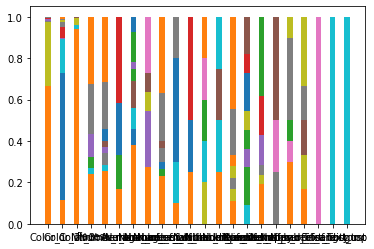

In [ ]:
#PIE CHART : explode pour ressortir le resultat que l'on veut vraiment
n_rows = len(x)
for row in range(n_rows):
    plt.pie(x[row], labels=list_others_columns, autopct="%1.0f%%")
plt.show()

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(data, y_data,test_size=0.05, random_state = 2)
knn_clf=KNeighborsClassifier(algorithm='auto')
knn_clf.fit(X_train,y_train)
ypred=knn_clf.predict(X_test) #These are the predicted output values

In [ ]:
x = 10
print(x)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(data, y_data,test_size=0.05, random_state = 2)
knn_clf=KNeighborsClassifier(algorithm='auto')
knn_clf.fit(X_train,y_train)
ypred=knn_clf.predict(X_test) #These are the predicted output values

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
result = confusion_matrix(y_test.values.argmax(axis=1), ypred.argmax(axis=1))
print('Confusion Matrix:')
print(result)
result1 = classification_report(y_test, ypred)
print('Classification Report:',)
print (result1)
result2 = accuracy_score(y_test,ypred)
print('Accuracy:',result2)

In [ ]:
import pickle
s = pickle.dumps(knn_clf)
clf2 = pickle.loads(s)
clf2.predict(X_test[1:2])

In [ ]:
y_test[1:2]

In [ ]:
from joblib import dump, load
dump(knn_clf, 'model_nostradamovies.joblib') 

In [ ]:
with open('../input/nostradamovies-datasets-for-train/model_nostradamovies.joblib', 'rb') as f:
    m = load(f)
    uv = m.predict(X_test[1:2])
    print(uv)
    print(type(X_test[1:2]))
    print(X_test[1:2])

In [ ]:
with open('../input/nostradamovies-datasets-for-train/model_nostradamovies.joblib', 'rb') as f:
    m = load(f)
    uv = m.predict(X_test[1:2])
    print(uv)
    print(type(X_test[1:2]))
    print(X_test[1:2])